## Import Dependency

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [7]:
file =  '../Dataset/student_depression_dataset.csv'

In [10]:
df = pd.read_csv(file)

## Exploratory Data Analysis (EDA)

In [13]:
# Sample Data
# Result: Redundant Data Column Work Pressure, Job Satisfaction
print(df.head())

# Rows and Columns Count
print ("Rows and Column")
print(df.shape)

# Get basic statistics for numerical columns
print(df.describe())

# Check column data types
print(df.dtypes)

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [15]:
# Check for missing values
# Result: No missing data

print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [17]:
# Check for Data Consistency
# Result: City column has noises, Profession Redundant data column, Degree require feature engineering to, rename and encode suicidal thoughs column,

# Get the count of unique values in each categorical column
categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree'
                       , 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Family History of Mental Illness'
                      ,'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']  # Add more categorical columns as needed

for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(df[column].value_counts())
    print("\n")


Unique values in 'Gender':
Gender
Male      15547
Female    12354
Name: count, dtype: int64


Unique values in 'City':
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi

In [19]:
# Check for Duplicate Data
# Result: No Duplicate Data

print(f"Duplicate rows: {df.duplicated().sum()}")

# Display duplicates (optional, to inspect them)
duplicates = df[df.duplicated()]
print(duplicates)

Duplicate rows: 0
Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


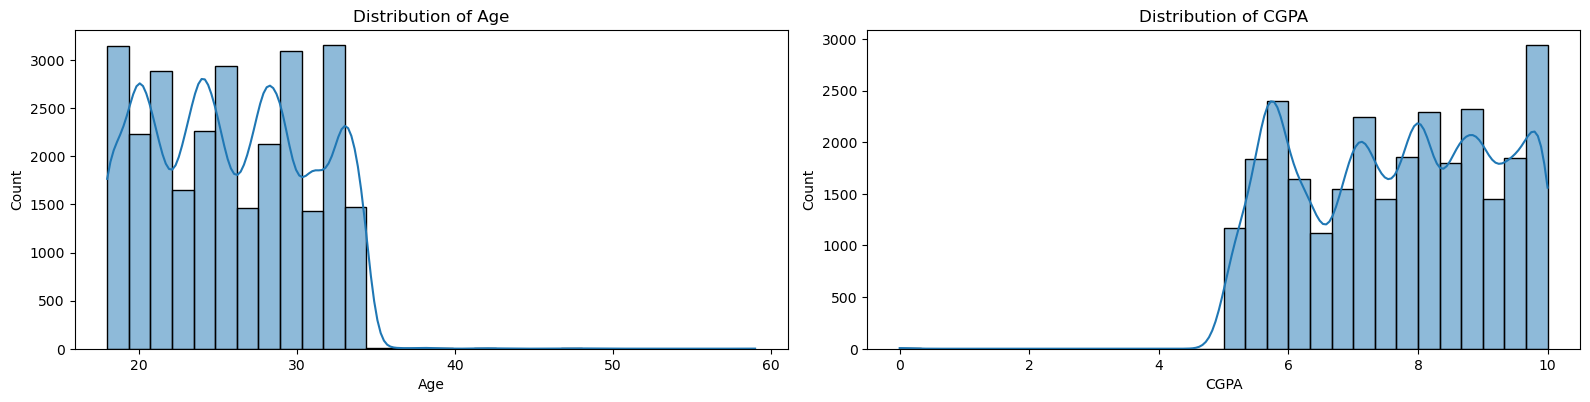

In [40]:
# List of continuous numerical columns
numerical_cols = ['Age', 'CGPA']

# Create a figure and axes for subplots with a 1x2 grid (1 row, 2 columns)
plt.figure(figsize=(16, 15))  # Adjusted size for 2 subplots

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)  # 1 row, 2 columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


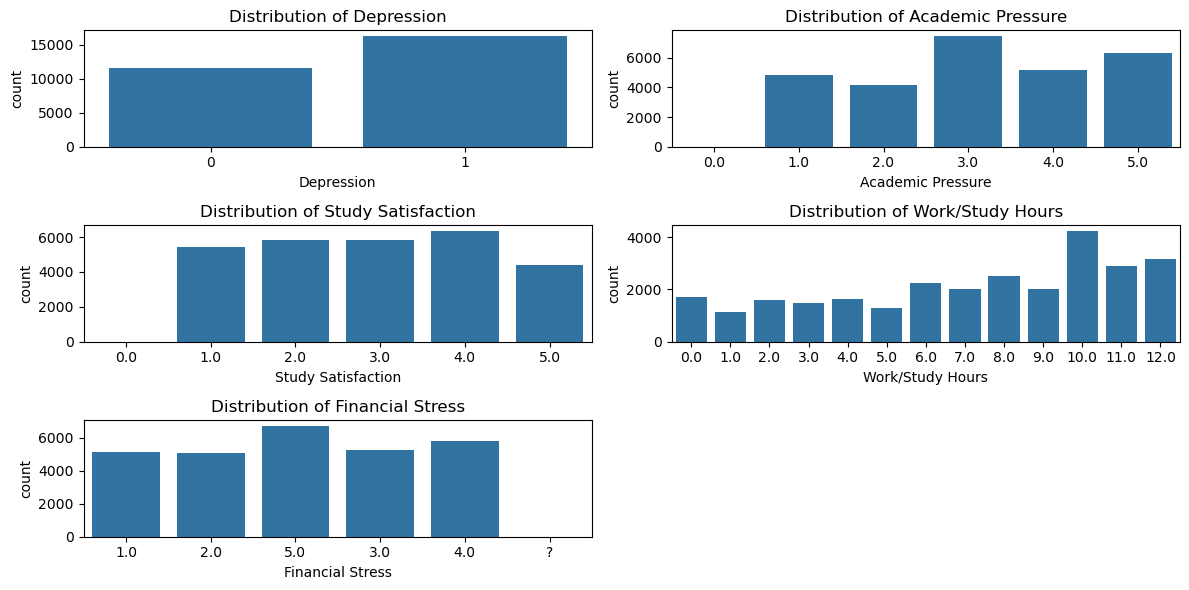

In [79]:
# Bar plots for categorical features
categorical_cols = ['Depression', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']

plt.figure(figsize=(12, 6))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)  # 1 row, 3 columns
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [70]:
# Encode Categorical data to numeric
# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Financial Stress', 'Gender', 'City', 'Profession', 
    'Sleep Duration', 'Dietary Habits', 'Degree', 
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'], drop_first=False)
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index([], dtype='object')
